In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)

c:\Users\hrey2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# split data into train and test with train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=1)

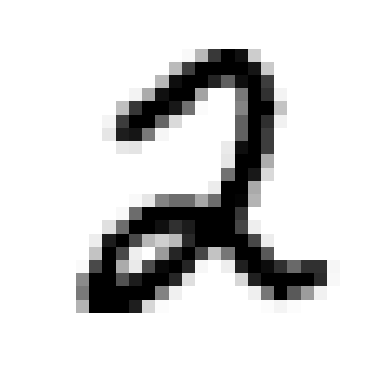

In [3]:
some_digit = x_train[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [4]:
from sklearn.linear_model import SGDClassifier

#use SGDClassifier to find if a image is 2 or not

# create target vectors for classification task (is the digit 2 or not)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)


sgd_clf = SGDClassifier(random_state=1)

sgd_clf.fit(x_train, y_train_2)



SGDClassifier(random_state=1)

Le score de précision c'est la proportion de prédictions positives qui sont correctes.
Le score de rappel (recall) c'est la proportion de vrais positifs qui sont correctement prédits.

In [5]:
from sklearn.metrics import precision_score, recall_score

y_pred = sgd_clf.predict(x_test)

print("precision_score is",precision_score(y_test_2, y_pred))
print("recall score is",recall_score(y_test_2, y_pred))

precision_score is 0.880846873461349
recall score is 0.8422787193973634


In [6]:
# let's use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=1)
forest_clf.fit(x_train, y_train_2)

RandomForestClassifier(random_state=1)

In [7]:
y_pred_forest = forest_clf.predict(x_test)

print("precision_score is",precision_score(y_test_2, y_pred_forest))
print("recall score is",recall_score(y_test_2, y_pred_forest))

precision_score is 0.9890965732087228
recall score is 0.8968926553672316


In [8]:
# Classificateur multiclasse avec SGDClassifier (Support Vector Classification base support vector machine)
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [9]:
# test 

y_pred_svc = svm_clf.predict(x_test)


In [10]:
print("precision_score is",precision_score(y_test, y_pred_svc,average='macro'))
print("recall score is",recall_score(y_test, y_pred_svc,average='macro'))

precision_score is 0.9777282476282615
recall score is 0.9777622828274073


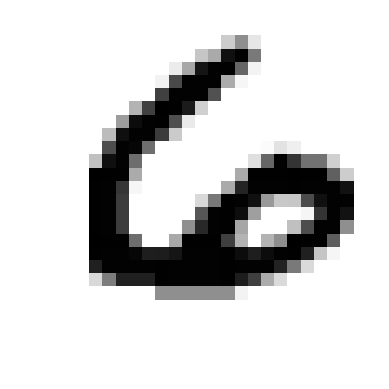

the model predicted 6 and the real value is 6


In [11]:
from random import randint

# test 
rand = randint(0,len(x_test)-1)
some_digit = x_train[rand]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

print("the model predicted",svm_clf.predict([some_digit])[0], "and the real value is",y_train[rand])